# <center> Tutorial: image manipulation with Python </center>

In this notebook, we practice manipulating images with several Python libraires, using a dataset of aerial images (PNG format) in the South of France.

Images here are regular PNG or JPEG files. To analyse geospatial data, such as TIFF images and GEOJSON or XML files, please refer to the Raster manipulation tutorial.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-images" data-toc-modified-id="Load-images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load images</a></span></li><li><span><a href="#Normalize-images" data-toc-modified-id="Normalize-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Normalize images</a></span></li><li><span><a href="#Resize-images" data-toc-modified-id="Resize-images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Resize images</a></span></li><li><span><a href="#Transform-images" data-toc-modified-id="Transform-images-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transform images</a></span></li><li><span><a href="#Data-augmentation" data-toc-modified-id="Data-augmentation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data augmentation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [155]:
# regular ML imports
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time
import random
import os
from os import listdir
import glob
import shutil

# image manipulation imports
import numpy as np
from PIL import Image
import cv2
from scipy import ndarray
import skimage as sk
from skimage import io 
from skimage import transform, img_as_ubyte
from skimage.transform import resize, rotate, AffineTransform, warp
from skimage import util
from skimage.util import random_noise
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

## Load images

Several libraries can be used to load and manipulate images: `PIL`, `numpy`, `opencv`, `matplotlib`, `scikit-image`, `keras`.

* Load individual images:

PNG 

RGB
(700, 701) 

float32
(701, 700, 3)


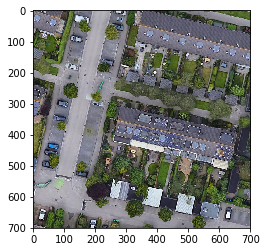

In [18]:
# load an image with Pillow
image_PIL = Image.open('../Data/Data sud france classif/Images/img_sat_1.png')
print(image_PIL.format,'\n')
# load an image with keras.preprocessing.image
img2 = load_img('../Data/Data sud france classif/Images/img_sat_1.png')

# read an image as a numpy array with opencv
img = cv2.imread('../Data/Data sud france classif/Images/img_sat_1.png') # beware, loads as BGR channel format# read an image as a numpy array with matplotlib
image_plt = matplotlib.image.imread('../Data/Data sud france classif/Images/img_sat_1.png')
# read an image as a numpy array with skimage
#img3 = sk.io.imread('../Data/Data sud france classif/Images/img_sat_1.png')

# convert a keras.preprocessing.image image to numpy array
data = img_to_array(img2)
# convert a PIL image to np array
image_PIL2 = np.asarray(image_PIL)
# convert back np array to PIL image
image_PIL = Image.fromarray(image_PIL2)

# summarize details about the image with PIL
print(image_PIL.mode)
print(image_PIL.size,'\n')
# summarize details about the image (as np array) with matplotlib
print(image_plt.dtype) # shows same results for image_PIL2
print(image_plt.shape)

# show the image in other window with PIL
#image_PIL.show()

# show the image inline with matplotlib
plt.imshow(image_PIL) # works as well with image_plt (np array)
plt.show()

* Load a whole folder of images:

In [6]:
# Method 1: load images without order

loaded_images = list()
for filename in listdir('../Data/Data sud france classif/Images/'):
    try:
        img_data = matplotlib.image.imread('../Data/Data sud france classif/Images/' + filename)
        loaded_images.append(img_data)
        print('> loaded %s %s' % (filename, img_data.shape))
    except:
        pass

print('\n Succesfully loaded {} images.'.format(len(loaded_images)))
print(np.asarray(loaded_images).shape)

> loaded img_sat_48.png (701, 700, 3)
> loaded img_sat_60.png (400, 400, 3)
> loaded img_sat_100.png (701, 700, 3)
> loaded img_sat_114.png (701, 700, 3)
> loaded img_sat_128.png (400, 401, 3)
> loaded img_sat_129.png (700, 700, 3)
> loaded img_sat_101.png (700, 701, 3)
> loaded img_sat_61.png (400, 400, 3)
> loaded img_sat_75.png (701, 700, 3)
> loaded img_sat_49.png (701, 700, 3)
> loaded img_sat_88.png (701, 700, 3)
> loaded img_sat_63.png (401, 400, 3)
> loaded img_sat_77.png (701, 700, 3)
> loaded img_sat_117.png (700, 700, 3)
> loaded img_sat_103.png (400, 401, 3)
> loaded img_sat_102.png (701, 700, 3)
> loaded img_sat_116.png (400, 400, 3)
> loaded img_sat_76.png (401, 400, 3)
> loaded img_sat_62.png (700, 700, 3)
> loaded img_sat_89.png (701, 700, 3)
> loaded img_sat_99.png (401, 400, 3)
> loaded img_sat_66.png (700, 701, 3)
> loaded img_sat_72.png (700, 700, 3)
> loaded img_sat_112.png (700, 701, 3)
> loaded img_sat_106.png (400, 400, 3)
> loaded img_sat_107.png (700, 701, 3)


In [ ]:
# Method 2: load images in alphabetical order, to match with labels' csv file

filenames = glob.glob('../Data/Data sud france classif/Images/img_sat_*.png')
filenames.sort()

loaded_images = [matplotlib.image.imread(img) for img in filenames] # list comprehension rather than loop
loaded_images = np.asarray(loaded_images)

print('Dataset shape:', loaded_images.shape)

In [ ]:
# Method 3: if you have several folders to load at once

dataset=[]
for i in range(1,3): # nb of folders
    filenames = glob.glob('../Data/Data sud france classif/Image_aug_{}/img_sat_*.jpg'.format(i))
    filenames.sort()
    loaded_images = [matplotlib.image.imread(img) for img in filenames]
    loaded_images = np.asarray(loaded_images)
    dataset = np.concatenate((dataset, loaded_images))
    print('Folder {} loaded.'.format(i))
    print('Dataset shape:', np.asarray(dataset).shape)

## Normalize images

* When images are imported with PIL (`Image.open`) and converted `asarray`, they can then be normalized with the following code:

In [10]:
# normalize pixel values of image_PIL to speed up training

# confirm pixel range is 0-255
pixels = np.asarray(image_PIL)
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


* When imported with `plt.imread`, they are already normalized. 

## Resize images

* To resize an image with PIL:

In [8]:
# resize and preserve aspect ratio
image_PIL2.thumbnail((100,100)) # width reduced to 100, but height will adapt
print(image_PIL2.size)

# resize and ignore original aspect ratio
resized = image_PIL.resize((200,200))
print(resized.size)

# crop image
cropped = image_PIL.crop((100, 100, 200, 200))
# -> corresponds to the top left (100,100) and bottom rigth (200,200) corners of the image
cropped.show()

* To resize an image stored as a np array, there is no built-in `numpy` function. However we can use either `opencv` or `scikit_image`:

In [22]:
# with opencv
img = cv2.imread('../Data/Data sud france classif/Images/img_sat_1.png')
res = cv2.resize(img, dsize=(400, 400), interpolation=cv2.INTER_CUBIC)
print(img.shape)
print(res.shape)

# several interpolation methods are possible depending on task
# beware, opencv loads images in BGR channel format and swaps dimensions,
# i.e. dsize takes in (x, y), vs. np who shows shape as (y, x), y rows and x columns

(701, 700, 3)
(400, 400, 3)


In [21]:
# with skimage
image_resized = resize(image_plt, (400, 400))
print(image_resized.shape)

(400, 400, 3)


## Transform images

* Image transformations with `PIL`:

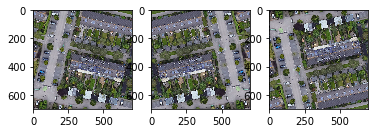

In [35]:
# convert the image to grayscale
gs_image = image_PIL.convert(mode='L')
gs_image.show()

# save in chosen format
#gs_image.save('<filename>.<format>')

# horizontal flip
hoz_flip = image_PIL.transpose(Image.FLIP_LEFT_RIGHT)
# vertical flip
ver_flip = image_PIL.transpose(Image.FLIP_TOP_BOTTOM)
# plot all three images using matplotlib
plt.subplot(131) # 1x3 grid, 1st subplot
plt.imshow(image_PIL)
plt.subplot(132)
plt.imshow(hoz_flip)
plt.subplot(133)
plt.imshow(ver_flip)
plt.show()

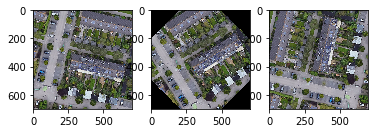

In [7]:
# rotate image
plt.subplot(131)
plt.imshow(image_PIL)
plt.subplot(132)
plt.imshow(image_PIL.rotate(45)) # rotate 45 degrees
plt.subplot(133)
plt.imshow(image_PIL.rotate(90)) # rotate 90 degrees
plt.show()

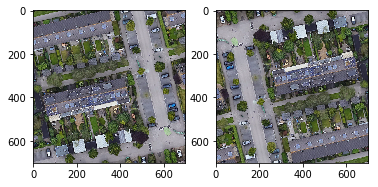

In [14]:
# flip image
plt.subplot(121)
plt.imshow(image_PIL.transpose(Image.FLIP_LEFT_RIGHT)) # horizontal flipping
plt.subplot(122)
plt.imshow(image_PIL.transpose(Image.FLIP_TOP_BOTTOM)) # vertically flipping
plt.show()

* Image transformations with `opencv`:

(701, 700)


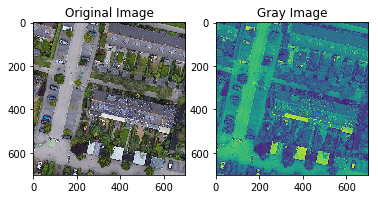

In [21]:
# grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert from RGB (cv2) to BGR for matplotlib

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray.shape)

plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(gray)
plt.title("Gray Image")
plt.show()

In [40]:
# resize
img = cv2.resize(img,(700,700))
img.shape

(700, 700, 3)

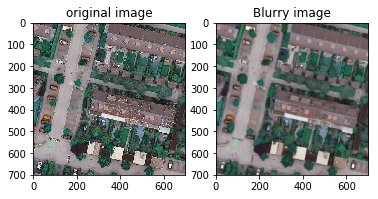

In [57]:
# blur
blur_image = cv2.GaussianBlur(img, (11,11),0)

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Blurry image')
plt.imshow(blur_image)
plt.show()

* Image transformation with `numpy`:

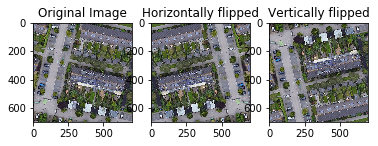

In [44]:
# image flip (i.e. flipping np matrix)

plt.subplot(131) 
plt.title("Original Image") 
plt.imshow(image_plt)

hflipped_image= np.fliplr(image_plt) #fliplr reverses the order of columns of pixels in matrix
plt.subplot(132) 
plt.title("Horizontally flipped")
plt.imshow(hflipped_image)

vflipped_image= np.flipud(image_plt) #flipud reverses the order of rows of pixels in matrix
plt.subplot(133)
plt.title("Vertically flipped")
plt.imshow(vflipped_image)
plt.show()

* Image transformation with `scikit-image`:

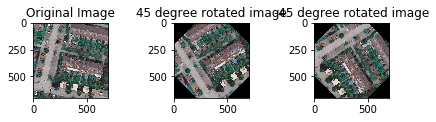

In [46]:
# image rotation

r_image = rotate(img, angle=45) # angle value is positive for anticlockwise rotation 
r_image1 = rotate(img, angle=-45) #angle value is negative for clockwise rotation

plt.subplot(131)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(r_image)
plt.title("45 degree rotated image")
plt.subplot(133)
plt.imshow(r_image1)
plt.title("-45 degree rotated image")
plt.tight_layout()
plt.show()

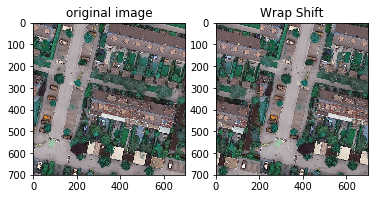

In [48]:
# image shift

transform = AffineTransform(translation=(-200,0))  # (-200,0) are x and y coordinate, change it see the effect
warp_image = warp(img, transform, mode="wrap")
# mode parameters are: {'constant', 'edge', 'symmetric', 'reflect', 'wrap'}, default is constant
# after shift, an object at location (x,y) in the input image is shifted to a new position (x + dx, y + dy)

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Wrap Shift')
plt.imshow(warp_image)
plt.show()

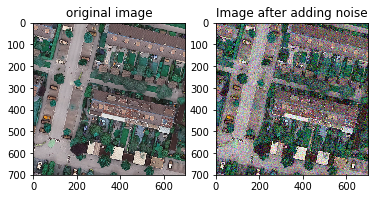

In [49]:
# random noise

noisy_image= random_noise(img)

plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Image after adding noise')
plt.imshow(noisy_image)
plt.show()

## Data augmentation

* Approach 1 - "dataset expansion"

To improve model performance, we often need more training images. We can create them based on our existing images with data augmentation techniques. The first approach consists in simply creating new images based on our initial dataset, through transformations such as rotations, adding noise, etc.

You'll find below a simple script to apply 1 transformation per image, using `skimage`:

In [50]:
# 3 functions to be used in data augmentation script

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

In [60]:
# our folder path containing the images
folder_path = '../Data/Data sud france classif/'
# the number of file to generate
num_files_desired = 10

# loop on all files of the folder and build a list of files paths
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

num_generated_files = 0
while num_generated_files < num_files_desired:
    # random image from the folder
    image_path = random.choice(images)
    # read image as an two dimensional array of pixels
    image_to_transform = cv2.imread(image_path)
    image_to_transform = cv2.cvtColor(image_to_transform, cv2.COLOR_RGB2BGR)

    # dictionary of the transformations functions we defined earlier
    available_transformations = {
        'rotate': random_rotation,
        'noise': random_noise,
        'horizontal_flip': horizontal_flip
    }

    # choose a random transformation to apply for a single image
    key = random.choice(list(available_transformations))
    transformed_image = available_transformations[key](image_to_transform)
    num_generated_files += 1
    
    # define a name for our new file
    new_file_path = '%s/augmented_image_%s.jpg' % (folder_path, num_generated_files)
    
    # write image to the disk
    transformed_image = img_as_ubyte(transformed_image) # convert to uint8 to save it on disk
    #sk.io.imsave(new_file_path, transformed_image)

And finally, you'll find below a more complex data augmentation script, with mutliple libraries and multiple transformations per image. The script loops a chosen nb of times (e.g. 5) over the original images and writes new augmented images in separate folders (so that we can still match them with labels).

In [2]:
"""
Functions for data augmentation
"""

def anticlockwise_rotation(image):
    angle = random.randint(0,180)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle = random.randint(0,180)
    return rotate(image, -angle)

def h_flip(image):
    return np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

def add_noise(image):
    return random_noise(image)

#def blur_image(image):
#    return cv2.GaussianBlur(img, (9,9),0)
# -> blurring probably not so good for small object detection

#def warp_shift(image): 
#    transform = AffineTransform(translation=(0,40))  #chose x,y values according to your convinience
#    warp_image = warp(image, transform, mode="wrap")
#    return warp_image
# -> warp shift not recommended either because it distorts image
# -> but can be used in many use cases, like classifying blur and non-blur images

In [ ]:
"""
Parameters for data augmentation
"""

transformations = {'rotate anticlockwise': anticlockwise_rotation,
                   'rotate clockwise': clockwise_rotation,
                   'horizontal flip': h_flip, 
                   'vertical flip': v_flip,
                   'adding noise': add_noise,
                  }

nb_loops = 5 # nb of times we expand our dataset

# paths of all images in our original folder
images_path = '../Data/Data sud france classif/Images/'
images = []
for im in os.listdir(images_path):  
    images.append(im)

images_to_generate = len(images) # nb of new images to generate at each loop over our dataset

In [6]:
"""
Data augmentation script
"""

for iterations in range(1,nb_loops):
    
    # create a new folder to save new images
    augmented_path = '../Data/Data sud france classif/Image_aug_{}/'.format(iterations)
    if not os.path.exists(augmented_path):
        os.mkdir(augmented_path)
    #or: from pathlib import Path
    #Path(augmented_path).mkdir(parents=True, exist_ok=True)
    
    generated_counter = 1 # to count new images in while loop
    while generated_counter <= images_to_generate:    
        
        # select and read image
        image_name = images[generated_counter] # for random choice: image = random.choice(images)
        original_image = cv2.imread(os.path.join(images_path,image_name))
        transformed_image = None

        # apply n transformations to each image
        n = 0  # counter
        transformation_count = random.randint(1, len(transformations)) # choose random number of transformations
        while n <= transformation_count:
            key = random.choice(list(transformations)) # randomly choosing transformation to call
            transformed_image = transformations[key](original_image)
            n = n + 1
        
        #  save the new image
        new_image_path = "%s/%s_aug_%s.png" %(augmented_path, images[generated_counter], iterations)
        transformed_image = img_as_ubyte(transformed_image)
        cv2.imwrite(new_image_path, transformed_image)
        generated_counter = generated_counter + 1

    print('Augmented folder {} successfuly created.'.format(iterations))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111


KeyboardInterrupt: 

The code will fail if there are `.DS_Store` (mac) files in the folder. Make sure to delete them beforehand if needed with terminal commands: `cd` to folder, and `find . -name '.DS_Store' -type f -delete`.

The last cell generates the labels corresponding to the augmented images:

In [93]:
print(label_values.shape)
aug_labels = np.concatenate([label_values]*5)
print(aug_labels.shape)

# to stack them with a separation between each array (i.e. a 3d dimension), code would be:
#aug_labels_sep = np.stack([label_values]*5)
#aug_labels_sep = np.concatenate([label_values[np.newaxis, :, :]]*5)
#aug_labels_sep.shape

(193, 2)
(965, 2)


Of course, after creating augmented images, if you want to train a model you would need to load them (see section about loading images from multiple folders) and preprocess them (resizing, etc.). 

* Approach 2 - "on-the-fly" data augmentation

The second approach consists in augmenting our data as part of the CNN training process, using **Keras's image preprocessing tools**. The advantage of this technique is that transformed images are generated "on the fly", i.e. **at each epoch the model trains on new transformations of our initial images**, which makes it much more robust for generalization.

Here, we use Keras's `ImageDataGenerator` to create an augmented dataset based on 1 image, just as an example. To see an example on a full dataset, you can check the script in the PV Panel classifier notebook.

In [25]:
# load the input image, convert to np array, and reshape it to have an extra dimension
image = load_img('../Data/Data sud france classif/Images/img_sat_1.png') # could be several images as well
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
print(image.shape)

(1, 701, 700, 3)


In [26]:
# initialize data generator (default parameters)
datagen = ImageDataGenerator(rotation_range=30, zoom_range=0.15, width_shift_range=0.2, 
                             height_shift_range=0.2, shear_range=0.15, 
                             horizontal_flip=True, fill_mode="reflect")

# additional possible parameters: brightness_range=[0.2,1.0], zoom_range=[0.5,1.0]

In [27]:
# create the actual Python generator
imageGen = datagen.flow(image, batch_size=1,
                        save_to_dir='../Data/Data sud france classif',
                        save_prefix="image", save_format="jpg")

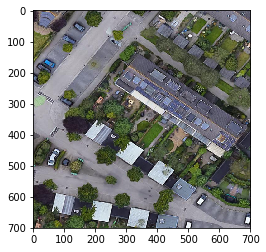

In [33]:
# initialize the total number of images generated thus far
total = 0
desired_total = 10

# loop over outputs from our generator
for image in imageGen:
    total += 1
    if total == desired_total:
        break
        
# plot an example
ex = load_img('../Data/Data sud france classif/image_0_489.jpg')
plt.imshow(ex)
plt.show()

## Conclusion

These are a few useful functions and commands to manipulate images as part of a data science project with Python. The list is still to be completed with more tips!